In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import networkx
network = networkx.generators.erdos_renyi_graph(1000, 0.1, directed=True)
print network.number_of_edges()

100094


<function matplotlib.pyplot.show>

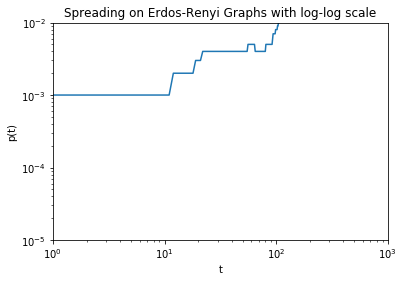

In [18]:
# probability
p = 0.0001
# above 0.0001 spreads
# under doesn't
p2 = 0.001
d = 0.01
# time step
# keep track of state of every node
import random

INFECTED = 1
NOT_INFECTED = 0
# initialization
for node in network.nodes():
    network.node[node]['infected'] = NOT_INFECTED
# start with fraction of nodes being infected
amtInfected = int(d * network.number_of_nodes())
for i in range(amtInfected):
    x = random.choice(network.nodes())
    network.node[x]['infected'] = INFECTED

# tn each time step: determine state transition based on prev state
def update_network(network, p, num_infections):
    for node in network.nodes():
        if network.node[node]['infected'] is INFECTED:
            for n in network.neighbors(node):
                # and infect them w prob p
                if network.node[n]['infected'] is NOT_INFECTED:
                    if random.random() < p:
                    # infect, check by if p is 1.0, it is always true
                        network.node[n]['infected'] = INFECTED
                        num_infections += 1
            if random.random() < p2:
                network.node[node]['infected'] = NOT_INFECTED
                num_infections -= 1
    return num_infections

###############

num_infections = 1
result = []

for i in range(1000):
    num_infections = update_network(network, p, num_infections)
    density = float(num_infections) / float(network.number_of_nodes())
    result.append(density)
    
len(result)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result)
plt.yscale('log')
plt.xscale('log')
plt.axis([1, 1000, .00001, .01])
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Spreading on Erdos-Renyi Graphs with log-log scale')
plt.show

In [30]:
survival = []
for i in range(len(result)):
    survival.append(1 - result[i])
#survival = survival[:200]

<function matplotlib.pyplot.show>

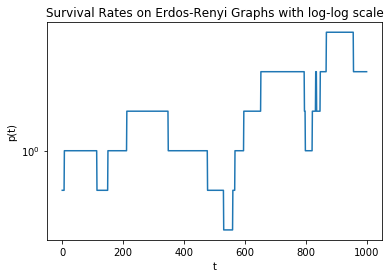

In [31]:
plt.plot(survival)
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('p(t)')
plt.title('Survival Rates on Erdos-Renyi Graphs with log-log scale')
plt.show